# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# **Load Dataset**

In [2]:
# Load California Housing data
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Preprocessing**

In [3]:
# Split features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Train Models**

In [4]:
# Underfitting model: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Overfitting model: Deep Decision Tree
dt = DecisionTreeRegressor(max_depth=30)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Regularized model: XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


# **Evaluation**

In [5]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


Linear Regression - MSE: 0.5559, R2 Score: 0.5758
Decision Tree - MSE: 0.5003, R2 Score: 0.6182
XGBoost - MSE: 0.2390, R2 Score: 0.8176


# **Learning Curve Visualization**

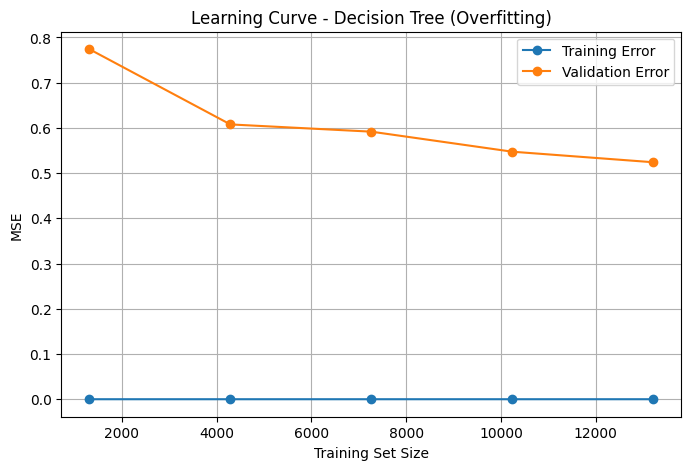

In [6]:
# Learning Curve for Decision Tree (likely overfitting)
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Error")
plt.title("Learning Curve - Decision Tree (Overfitting)")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


# **Summary**



In this experiment, we explored overfitting and underfitting using three models on the California Housing dataset:

- **Linear Regression (Underfitting)**  
  This simple model achieved an R² score of **0.5758**, with an MSE of **0.5559**. Its limited complexity caused it to underfit, failing to capture the non-linear relationships in the data.

- **Decision Tree (Overfitting)**  
  With a high depth of 30, the Decision Tree achieved slightly better performance (R² = **0.6182**, MSE = **0.5003**) but showed signs of overfitting. It learned the training data too well, at the cost of generalization on the test set.

- **XGBoost (Balanced Model with Regularization)**  
  XGBoost significantly outperformed both, with an R² of **0.8176** and MSE of **0.2390**. It effectively managed bias and variance by using boosting and regularization, preventing both underfitting and overfitting.

### Key Takeaways:
- Underfitting occurs when a model is too simple to capture the data patterns.
- Overfitting happens when the model is too complex and memorizes the training data.
- Techniques like regularization, limiting model depth, and using ensemble methods (e.g., XGBoost) can help strike a good balance.
- Learning curves are a helpful diagnostic tool to visualize bias-variance behavior.

This experiment demonstrates the importance of selecting the right model complexity and tuning it to avoid both extremes.
